In [1]:
from wpspec import Quantum, harmonic, pib
from matplotlib import pyplot as plt
import numpy as np


params = {'box_length': 4, 'v_offset': 0, 'grid_points': 500, 'wfc_offset': 0, 'system': 'pib'}

wf = Quantum(params)
#print(wf.x)
#print(wf.Psi)

wf.dt = 0.01
D = 1
a = 1.5
re = 0
#### Morse potential 
wf.V = D*(1 - np.exp(-a*(wf.x - re)))**2
#### wf.build_operator()
#plt.plot(wf.x,  wf.Psi, 'blue', label='analytic')
#plt.plot(wf.x,  wf.V, 'red', label='Potential')
#plt.plot(wf.x, T_Psi, 'r--', label='Derivative')
#plt.ylim(-1,2)
#plt.show()


[ 7.07106781e-01  7.07106781e-01 -6.50652064e-17 -5.33549230e-17
 -2.40193133e-17  3.94556417e-17 -1.03973294e-17 -4.36428432e-17
 -2.89689503e-17 -5.07209682e-17  5.54838344e-17  4.52571821e-17
 -3.48073367e-17 -7.17813836e-17  1.64365473e-16 -1.86861821e-17
 -8.99023830e-17  1.28846417e-16 -1.10082096e-16  1.54473399e-17
 -9.08116728e-17  1.17516504e-16  3.88318020e-17 -1.50542742e-16
  2.28216510e-16  8.58997288e-17 -2.06272851e-16 -5.67025031e-17
  1.56634603e-16  4.50176836e-17 -5.25012197e-17  3.92760707e-17
  2.38048869e-16 -4.67133165e-16 -5.13963499e-16 -2.32629129e-17
  3.45302298e-16  4.90962319e-16 -9.56808417e-17 -4.93472925e-16
 -2.77726857e-16  1.66314919e-17  4.69313851e-16  7.28448335e-17
 -1.28272975e-16 -2.38407587e-16  2.44389334e-16 -6.61185448e-17
 -8.43610934e-17  7.38943073e-17  1.87119742e-16  3.74117512e-17
 -6.85495294e-17 -4.19382953e-16  4.87408169e-17 -2.78296910e-16
  1.54308227e-16  6.99268050e-17  1.72815050e-16 -2.47723256e-17
  1.11853242e-16 -1.17055

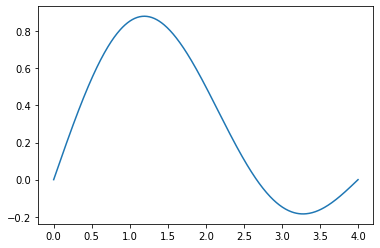

In [2]:
pi = pib(params)
pi.Psi = np.sqrt(1/2) * pi.eigenfunction(1) + np.sqrt(1/2) * pi.eigenfunction(2)
plt.plot(pi.x, pi.Psi)

pi.expand_pib()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,
fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
#ho = harmonic(params)
#ho.Psi = ho.eigenfunction(4)
#plt.plot(ho.x, ho.Psi**2)

In [ ]:
wf.finite_difference_T_matrix()
wf.finite_difference_V_matrix()
wf.finite_difference_H_matrix()


from scipy.sparse.linalg import eigs

vals, vecs = eigs(wf.H_matrix, k=5,  which='SM')
print(vals[0])

plt.plot(wf.x, vecs[:,2]**2, 'red')
#plt.plot(wf.x, wf.V, 'b--')
#plt.ylim(0,0.005)
plt.show()

In [ ]:

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


### parameters for plot
ax.set_xlim((-wf.L, wf.L))
ax.set_ylim((-1, 2))

line, = ax.plot([], [], lw=2)
line1, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line1.set_data([], [])
    return (line, line1,)

In [ ]:
N_time = 300

# animation function. This is called sequentially  
def animate(i):
    
    line.set_data(wf.x, wf.Psi)
    line1.set_data(wf.x, wf.V)
    wf.split_op()
    return (line, line1,)
  
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=N_time, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim